In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
src=pd.read_csv('source.csv')
target=pd.read_csv('target.csv')

In [3]:
src.head()

,module,attribute name,description of the attribute,critical data element (Yes/no),field type,possible values,value/data source,business entity name,Ui screen/ section,UI attribute name
0,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,Alphanumeric ID,Core Banking System,Customer,Profile,Customer ID
1,Customer,Customer_Name,Full legal name of the customer,Yes,String,Alphabetic with spaces,CRM,Customer,Profile,Customer Name
2,Account,Account_Number,Unique number assigned to a customer account,Yes,String,10-16 digit numeric,Core Banking System,Account,Accounts,Account Number
3,Account,Account_Type,Type of account maintained by the customer,No,String,"Savings, Current, Fixed Deposit",Core Banking System,Account,Accounts,Account Type
4,Loan,Loan_ID,Unique loan identifier,Yes,String,Auto-generated,Loan Management System,Loan,Loans,Loan ID


In [4]:
target.head()

,TDM Attribute Record,attribute name,object being described,description of the attribute,attribute type,rationale for inclusion,process prerequisite
0,TDM_001,Customer_ID,Customer,Primary key to identify a customer in TDM,Identifier,Regulatory compliance,KYC Verified
1,TDM_002,Customer_Name,Customer,Full name stored for reporting & AML,Descriptive,Audit requirement,KYC Verified
2,TDM_003,Account_Number,Account,Unique number associated with account in TDM,Identifier,Operational need,Active Account
3,TDM_004,Account_Type,Account,Classification of account type,Descriptive,Operational need,Active Account
4,TDM_005,Loan_ID,Loan,Unique loan number for monitoring,Identifier,Risk assessment,Approved Loan


In [5]:
src.columns

Index(['module', 'attribute name', 'description of the attribute',
       'critical data element (Yes/no)', 'field type', 'possible values',
       'value/data source', 'business entity name', 'Ui screen/ section',
       'UI attribute name'],
      dtype='object')

In [6]:
target.columns

Index(['TDM Attribute Record', 'attribute name', 'object being described',
       'description of the attribute', 'attribute type',
       'rationale for inclusion', 'process prerequisite'],
      dtype='object')

In [7]:
src_columns = src.columns.tolist()
tgt_columns = target.columns.tolist()

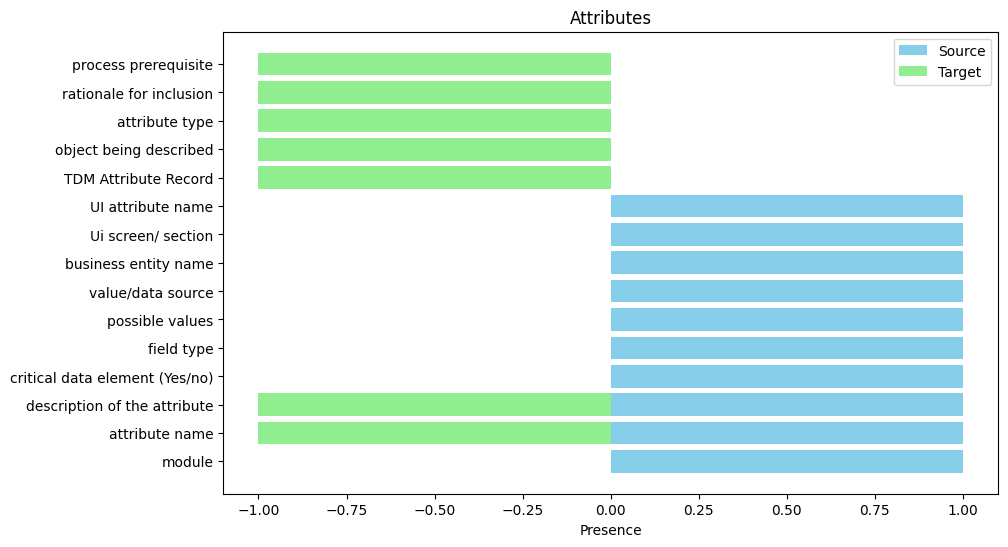

In [9]:
plt.figure(figsize=(10,6))
plt.barh(src_columns, [1]*len(src_columns), label="Source", color="skyblue")
plt.barh(tgt_columns, [-1]*len(tgt_columns), label="Target", color="lightgreen")
plt.title("Attributes")
plt.xlabel("Presence")
plt.legend()
plt.show()

In [10]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
src_emb = model.encode(src_columns, convert_to_tensor=True)
tgt_emb = model.encode(tgt_columns, convert_to_tensor=True)

In [12]:
cosine_scores = util.cos_sim(src_emb, tgt_emb)
matches = []
for i, s_col in enumerate(src_columns):
    best_match_idx = cosine_scores[i].argmax().item()
    best_score = cosine_scores[i][best_match_idx].item()
    t_col = tgt_columns[best_match_idx]
    matches.append([s_col, t_col, round(best_score, 3)])

In [13]:
df_matches = pd.DataFrame(matches, columns=["Source Column", "Best Match (Target)", "Similarity Score"])

In [14]:
df_matches = df_matches.sort_values(by="Similarity Score", ascending=False)
df_matches

,Source Column,Best Match (Target),Similarity Score
1,attribute name,attribute name,1.000
2,description of the attribute,description of the attribute,1.000
9,UI attribute name,attribute name,0.793
4,field type,attribute type,0.665
7,business entity name,attribute name,0.427
6,value/data source,description of the attribute,0.380
3,critical data element (Yes/no),process prerequisite,0.336
5,possible values,attribute type,0.233
0,module,attribute name,0.208
8,Ui screen/ section,object being described,0.176


In [15]:
combined = pd.merge(
    src,
    target,
    on="attribute name",
    how="outer",   
    suffixes=("_src", "_tgt") 
)
combined.head(100)

,module,attribute name,description of the attribute_src,critical data element (Yes/no),field type,possible values,value/data source,business entity name,Ui screen/ section,UI attribute name,TDM Attribute Record,object being described,description of the attribute_tgt,attribute type,rationale for inclusion,process prerequisite
0,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,Alphanumeric ID,Core Banking System,Customer,Profile,Customer ID,TDM_001,Customer,Primary key to identify a customer in TDM,Identifier,Regulatory compliance,KYC Verified
1,Customer,Customer_Name,Full legal name of the customer,Yes,String,Alphabetic with spaces,CRM,Customer,Profile,Customer Name,TDM_002,Customer,Full name stored for reporting & AML,Descriptive,Audit requirement,KYC Verified
2,Account,Account_Number,Unique number assigned to a customer account,Yes,String,10-16 digit numeric,Core Banking System,Account,Accounts,Account Number,TDM_003,Account,Unique number associated with account in TDM,Identifier,Operational need,Active Account
3,Account,Account_Type,Type of account maintained by the customer,No,String,"Savings, Current, Fixed Deposit",Core Banking System,Account,Accounts,Account Type,TDM_004,Account,Classification of account type,Descriptive,Operational need,Active Account
4,Loan,Loan_ID,Unique loan identifier,Yes,String,Auto-generated,Loan Management System,Loan,Loans,Loan ID,TDM_005,Loan,Unique loan number for monitoring,Identifier,Risk assessment,Approved Loan
5,Loan,Loan_Amount,The principal loan amount sanctioned,Yes,Decimal,Positive numbers,Loan Management System,Loan,Loans,Loan Amount,TDM_006,Loan,Sanctioned amount for loan stored in TDM,Numeric,Risk assessment,Approved Loan
6,Loan,Interest_Rate,Interest rate applied to loan,No,Decimal,0-20%,Loan Management System,Loan,Loans,Interest Rate,TDM_007,Loan,Rate of interest applied on loan,Numeric,Regulatory compliance,Approved Loan
7,Transaction,Transaction_ID,Unique identifier for a transaction,Yes,String,Auto-generated,Core Banking System,Transaction,Transactions,Transaction ID,TDM_008,Transaction,Reference number for transaction tracking,Identifier,Operational need,None
8,Transaction,Transaction_Date,Date of transaction execution,Yes,Date,YYYY-MM-DD,Core Banking System,Transaction,Transactions,Transaction Date,TDM_009,Transaction,Execution date of transaction,Date,Audit requirement,None
9,Transaction,Transaction_Amount,Amount transacted in INR,Yes,Decimal,Positive values,Core Banking System,Transaction,Transactions,Transaction Amount,TDM_010,Transaction,Amount transferred in transaction,Numeric,Risk assessment,None


In [16]:
import faiss
src_desc = src["description of the attribute"].fillna("").tolist()
tgt_desc = target["description of the attribute"].fillna("").tolist()
src_emb = model.encode(src_desc, convert_to_tensor=True, normalize_embeddings=True)
tgt_emb = model.encode(tgt_desc, convert_to_tensor=True, normalize_embeddings=True)
src_emb = src_emb.cpu().detach().numpy().astype("float32")
tgt_emb = tgt_emb.cpu().detach().numpy().astype("float32")
index = faiss.IndexFlatIP(tgt_emb.shape[1])
index.add(tgt_emb)

In [ ]:
matches = []
for i, s_vec in enumerate(src_emb):
    s_vec = s_vec.reshape(1, -1)
    scores, indices = index.search(s_vec, len(tgt_emb))
    for score, idx in zip(scores[0], indices[0]):
        matches.append({
            "Source Attribute": src["attribute name"].iloc[i],
            "Source Description": src["description of the attribute"].iloc[i],
            "Target Attribute": target["attribute name"].iloc[idx],
            "Target Description": target["description of the attribute"].iloc[idx],
            "Confidence Score": round(float(score), 3)
        })
df_matches = pd.DataFrame(matches)
threshold = 0
df_high_conf = df_matches[df_matches["Confidence Score"] >= threshold]
combined = pd.merge(
    df_high_conf,
    src,
    left_on="Source Attribute",
    right_on="attribute name",
    how="left"
).merge(
    target,
    left_on="Target Attribute",
    right_on="attribute name",
    how="left",
    suffixes=("_src", "_tgt")
)
combined.head(30)

,Source Attribute,Source Description,Target Attribute,Target Description,Confidence Score,module,attribute name_src,description of the attribute_src,critical data element (Yes/no),field type,...,business entity name,Ui screen/ section,UI attribute name,TDM Attribute Record,attribute name_tgt,object being described,description of the attribute_tgt,attribute type,rationale for inclusion,process prerequisite
0,Customer_ID,Unique identifier assigned to each customer,Customer_ID,Primary key to identify a customer in TDM,0.648,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_001,Customer_ID,Customer,Primary key to identify a customer in TDM,Identifier,Regulatory compliance,KYC Verified
1,Customer_ID,Unique identifier assigned to each customer,Account_Number,Unique number associated with account in TDM,0.610,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_003,Account_Number,Account,Unique number associated with account in TDM,Identifier,Operational need,Active Account
2,Customer_ID,Unique identifier assigned to each customer,Branch_ID,Unique identifier of bank branch,0.601,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_014,Branch_ID,Branch,Unique identifier of bank branch,Identifier,Operational need,None
3,Customer_ID,Unique identifier assigned to each customer,Card_Number,Unique number for card validation,0.518,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_011,Card_Number,CreditCard,Unique number for card validation,Identifier,Regulatory compliance,Active Account
4,Customer_ID,Unique identifier assigned to each customer,Loan_ID,Unique loan number for monitoring,0.502,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_005,Loan_ID,Loan,Unique loan number for monitoring,Identifier,Risk assessment,Approved Loan
5,Customer_ID,Unique identifier assigned to each customer,IFSC_Code,Unique IFSC code for branch,0.402,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_020,IFSC_Code,Branch,Unique IFSC code for branch,Identifier,Regulatory compliance,None
6,Customer_ID,Unique identifier assigned to each customer,Customer_Name,Full name stored for reporting & AML,0.367,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_002,Customer_Name,Customer,Full name stored for reporting & AML,Descriptive,Audit requirement,KYC Verified
7,Customer_ID,Unique identifier assigned to each customer,Transaction_ID,Reference number for transaction tracking,0.355,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_008,Transaction_ID,Transaction,Reference number for transaction tracking,Identifier,Operational need,None
8,Customer_ID,Unique identifier assigned to each customer,Account_Type,Classification of account type,0.339,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_004,Account_Type,Account,Classification of account type,Descriptive,Operational need,Active Account
9,Customer_ID,Unique identifier assigned to each customer,Email_ID,Email address for digital communication,0.231,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_017,Email_ID,Customer,Email address for digital communication,Descriptive,Operational need,KYC Verified


In [18]:
d1=combined.head(19)
d1

,Source Attribute,Source Description,Target Attribute,Target Description,Confidence Score,module,attribute name_src,description of the attribute_src,critical data element (Yes/no),field type,...,business entity name,Ui screen/ section,UI attribute name,TDM Attribute Record,attribute name_tgt,object being described,description of the attribute_tgt,attribute type,rationale for inclusion,process prerequisite
0,Customer_ID,Unique identifier assigned to each customer,Customer_ID,Primary key to identify a customer in TDM,0.648,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_001,Customer_ID,Customer,Primary key to identify a customer in TDM,Identifier,Regulatory compliance,KYC Verified
1,Customer_ID,Unique identifier assigned to each customer,Account_Number,Unique number associated with account in TDM,0.610,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_003,Account_Number,Account,Unique number associated with account in TDM,Identifier,Operational need,Active Account
2,Customer_ID,Unique identifier assigned to each customer,Branch_ID,Unique identifier of bank branch,0.601,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_014,Branch_ID,Branch,Unique identifier of bank branch,Identifier,Operational need,None
3,Customer_ID,Unique identifier assigned to each customer,Card_Number,Unique number for card validation,0.518,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_011,Card_Number,CreditCard,Unique number for card validation,Identifier,Regulatory compliance,Active Account
4,Customer_ID,Unique identifier assigned to each customer,Loan_ID,Unique loan number for monitoring,0.502,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_005,Loan_ID,Loan,Unique loan number for monitoring,Identifier,Risk assessment,Approved Loan
5,Customer_ID,Unique identifier assigned to each customer,IFSC_Code,Unique IFSC code for branch,0.402,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_020,IFSC_Code,Branch,Unique IFSC code for branch,Identifier,Regulatory compliance,None
6,Customer_ID,Unique identifier assigned to each customer,Customer_Name,Full name stored for reporting & AML,0.367,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_002,Customer_Name,Customer,Full name stored for reporting & AML,Descriptive,Audit requirement,KYC Verified
7,Customer_ID,Unique identifier assigned to each customer,Transaction_ID,Reference number for transaction tracking,0.355,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_008,Transaction_ID,Transaction,Reference number for transaction tracking,Identifier,Operational need,None
8,Customer_ID,Unique identifier assigned to each customer,Account_Type,Classification of account type,0.339,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_004,Account_Type,Account,Classification of account type,Descriptive,Operational need,Active Account
9,Customer_ID,Unique identifier assigned to each customer,Email_ID,Email address for digital communication,0.231,Customer,Customer_ID,Unique identifier assigned to each customer,Yes,String,...,Customer,Profile,Customer ID,TDM_017,Email_ID,Customer,Email address for digital communication,Descriptive,Operational need,KYC Verified


In [19]:
k = 3
results = []
for src_attr, group in df_matches.groupby("Source Attribute"):
    group_sorted = group.sort_values("Confidence Score", ascending=False).head(k)
    scores = group_sorted["Confidence Score"].tolist()
    ambiguous = False
    if len(scores) > 1:
        if max(scores) - min(scores) <= 0.05:  
            ambiguous = True
    case_type = "Ambiguous Case" if ambiguous else "Normal Case"  
    for _, row in group_sorted.iterrows():
        results.append({
            "Source Attribute": row["Source Attribute"],
            'Source Description': row["Source Description"],
            "Target Attribute": row["Target Attribute"],
            "Target Description": row["Target Description"],
            "Confidence Score": row["Confidence Score"],
            "Case Type": case_type
        })
df_topk = pd.DataFrame(results)
d1_names = combined["Source Attribute"].unique()
df_topk_subset = df_topk[df_topk["Source Attribute"].isin(d1_names)]
df_topk_subset

,Source Attribute,Source Description,Target Attribute,Target Description,Confidence Score,Case Type
0,Account_Number,Unique number assigned to a customer account,Account_Number,Unique number associated with account in TDM,0.774,Normal Case
1,Account_Number,Unique number assigned to a customer account,Card_Number,Unique number for card validation,0.666,Normal Case
2,Account_Number,Unique number assigned to a customer account,Branch_ID,Unique identifier of bank branch,0.591,Normal Case
3,Account_Type,Type of account maintained by the customer,Account_Type,Classification of account type,0.671,Normal Case
4,Account_Type,Type of account maintained by the customer,Payment_Mode,Mode of payment used,0.453,Normal Case
5,Account_Type,Type of account maintained by the customer,Account_Number,Unique number associated with account in TDM,0.389,Normal Case
6,Branch_ID,Unique identifier for branch,IFSC_Code,Unique IFSC code for branch,0.744,Normal Case
7,Branch_ID,Unique identifier for branch,Branch_ID,Unique identifier of bank branch,0.732,Normal Case
8,Branch_ID,Unique identifier for branch,Loan_ID,Unique loan number for monitoring,0.458,Normal Case
9,Branch_Name,Name of the branch,Branch_Name,Name of branch for reporting,0.708,Normal Case


In [20]:
ambiguous_cases = df_topk_subset[df_topk_subset['Case Type'] == 'Ambiguous Case']
ambiguous_cases

,Source Attribute,Source Description,Target Attribute,Target Description,Confidence Score,Case Type
24,Customer_ID,Unique identifier assigned to each customer,Customer_ID,Primary key to identify a customer in TDM,0.648,Ambiguous Case
25,Customer_ID,Unique identifier assigned to each customer,Account_Number,Unique number associated with account in TDM,0.610,Ambiguous Case
26,Customer_ID,Unique identifier assigned to each customer,Branch_ID,Unique identifier of bank branch,0.601,Ambiguous Case
